In [1]:
## tools

from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

In [2]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv,description="Query arxiv papers")
print(arxiv.name)

arxiv


In [3]:
arxiv.invoke("What is the latest research on quantum computing?")

'Published: 2025-12-16\nTitle: Tianyan: Cloud services with quantum advantage\nAuthors: Tianyan Quantum Group\nSummary: Tianyan Quantum Cloud Platform offers cloud services demonstrating quantum advantage capabilities with a Zuchongzhi 3.0-like superconducting quantum processor. This cloud-accessible superconducting quantum prototype, named Tianyan-287, features 105 qubits and achieves high operational fidelities, with single-qubit gates, two-qubit gates, and readout fidelity at 99.90%, 99.56%, 98.7'

In [5]:
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
wiki.name

'wikipedia'

In [7]:
from dotenv import load_dotenv
load_dotenv()

import os

os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [8]:
### Tavily Search Tool
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

C:\Users\Ayush\AppData\Local\Temp\ipykernel_10392\3584238.py:4: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  tavily = TavilySearchResults()


In [9]:
tavily.invoke("Provide me the recent AI news?")

[{'title': 'The Latest AI News and AI Breakthroughs that Matter Most',
  'url': 'https://www.crescendo.ai/news/latest-ai-news-and-updates',
  'content': "Date: September 7, 2025 Summary: Dutch chip-equipment giant ASML is set to become the largest shareholder in European AI startup Mistral AI by leading its €1.7 billion funding round with a €1.3 billion investment. The capital infusion values Mistral at €10 billion, making it the most valuable AI company in Europe. ASML will likely gain a board seat and could integrate Mistral’s AI and analytics capabilities into its lithography tools to boost efficiency and development. This move marks a strategic step toward strengthening Europe’s technological sovereignty and reducing dependence on U.S. and Chinese AI ecosystems. Mistral, co-founded by AI veterans from DeepMind and Meta, is seen as a European rival to firms like OpenAI and Google. Source: Reuters [...] ### Apple Sued by Authors Over AI Book Training\n\nDate: September 5, 2025  \nSum

In [10]:
## combine all these tools in the list
tools=[arxiv, wiki, tavily]

In [48]:
## Initialize the LLM Model
from langchain_groq import ChatGroq

llm = ChatGroq(model="llama-3.1-8b-instant")

In [49]:
llm.invoke("What is AI")

AIMessage(content='AI stands for Artificial Intelligence, which refers to the simulation of human intelligence in machines that are programmed to think and learn like humans. The term may also be applied to any machine that exhibits traits associated with a human mind such as learning and problem-solving.\n\nAI technology is based on the principle of creating algorithms and statistical models that enable computers to process data, make decisions, and improve their performance over time. This is often achieved through machine learning (ML) techniques, which involve training the AI system using large amounts of data to enable it to learn from experience and make predictions or decisions.\n\nThere are several types of AI, including:\n\n1. **Narrow or Weak AI**: This type of AI is designed to perform a specific task, such as playing chess, recognizing faces, or translating languages. Narrow AI is trained on a specific dataset and is not capable of general reasoning or problem-solving.\n2. 

In [50]:
llm_with_tools=llm.bind_tools(tools=tools)


In [51]:
## Execute this call
llm_with_tools.invoke("What is the recent news on AI?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'qezxcva1d', 'function': {'arguments': '{"query":"AI recent news"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 461, 'total_tokens': 481, 'completion_time': 0.054903865, 'completion_tokens_details': None, 'prompt_time': 0.16034663, 'prompt_tokens_details': None, 'queue_time': 0.07888549, 'total_time': 0.215250495}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c5608-890e-7042-b7a5-13c321688893-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'AI recent news'}, 'id': 'qezxcva1d', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 461, 'output_tokens': 20, 'total_tokens': 481})

In [52]:
## Execute this call
llm_with_tools.invoke("What is the latest research on quantum computing?")


AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'ktfqp2801', 'function': {'arguments': '{"query":"quantum computing latest research"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 462, 'total_tokens': 481, 'completion_time': 0.043322611, 'completion_tokens_details': None, 'prompt_time': 0.139675452, 'prompt_tokens_details': None, 'queue_time': 0.060984938, 'total_time': 0.182998063}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c5608-9da8-7570-bb1d-76662bc43ffb-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'quantum computing latest research'}, 'id': 'ktfqp2801', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 462, 'output_tokens': 19, 'total_tokens': 481})

In [53]:
## Execute this call
llm_with_tools.invoke("What is machine learning?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'djjy3xyds', 'function': {'arguments': '{"query":"machine learning"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 30, 'prompt_tokens': 458, 'total_tokens': 488, 'completion_time': 0.051470178, 'completion_tokens_details': None, 'prompt_time': 0.026694917, 'prompt_tokens_details': None, 'queue_time': 0.045756463, 'total_time': 0.078165095}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c5608-b08a-7620-96e5-26da598fe140-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'machine learning'}, 'id': 'djjy3xyds', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 458, 'output_tokens': 30, 'total_tokens': 488})

## Workflow 

In [54]:
## State Schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage ## Human message or AI message
from typing import Annotated  ## labelling
from langgraph.graph.message import add_messages  ## Reducers in Langgraph

In [55]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    

In [56]:
### Entire Chatbot With LangGraph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

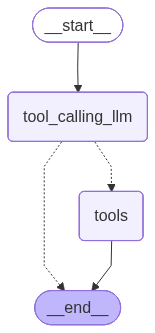

In [57]:
### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## Edgess
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", END)

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [58]:
messages=graph.invoke({"messages":"1706.03762"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (9y784dyy8)
 Call ID: 9y784dyy8
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or convolutional neural networks in an encoder-decoder configuration. The best performing models also connect the encoder and decoder through an attention mechanism. We propose a new simple network architecture, the Transformer, base


In [64]:
messages=graph.invoke({"messages":"black hole on recent research"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

black hole on recent research
================================== Ai Message ==================================
Tool Calls:
  arxiv (prwz91gq4)
 Call ID: prwz91gq4
  Args:
    query: black hole recent research
================================= Tool Message =================================
Name: arxiv

Published: 2006-06-28
Title: Accretion onto Supermassive Black Holes in Quasars: Learning from Optical/UV Observations
Authors: Paola Marziani, Deborah Dultzin-Hacyan, Jack W. Sulentic
Summary: Accretion processes in quasars and active galactic nuclei are still poorly understood, especially as far as the connection between observed spectral properties and physical parameters is concerned. Quasars show an additional degree of complexity compared to stars that is related to anisotropic emission/ob
================================== Ai Message ==================================
Tool Calls:
  wikipedia (gveha749

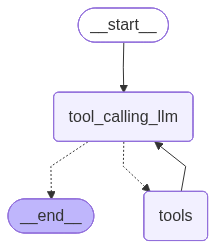

In [61]:
### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## Edgess
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "tool_calling_llm")

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [62]:
messages=graph.invoke({"messages":"What is the recent AI news and then please tell me the recent research paper on quantum computing?"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the recent AI news and then please tell me the recent research paper on quantum computing?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (jbcb5t4km)
 Call ID: jbcb5t4km
  Args:
    query: AI news
  arxiv (943zvgv9e)
 Call ID: 943zvgv9e
  Args:
    query: quantum computing recent research
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Latest AI News and AI Breakthroughs that Matter Most: 2026 & 2025", "url": "https://www.crescendo.ai/news/latest-ai-news-and-updates", "content": "Summary: Tesco, one of the United Kingdom’s largest supermarket chains, has entered into a three-year strategic partnership with French AI start-up Mistral AI to deepen its use of artificial intelligence across both customer-facing and internal operations. Under the agre